Three are the steps necessary to get a cleaned image.

1st part:Image Reduction &
2nd part:Image allignment

# 1st part :Cleaning of images or  Image  Reduction

# Steps to follow:

1) Bias correction

2) Flat correction

3) Cosmic Ray removal


Importing the Following packages:

In [2]:
import numpy as np
from pylab import *
import ccdproc,os,sys,time,random
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob
from astropy.nddata import CCDData
from astropy.stats import sigma_clipped_stats,SigmaClip
from astropy.visualization import ImageNormalize,LogStretch
from matplotlib.ticker import LogLocator
from astropy.stats import SigmaClip, mad_std

Ccdproc is an <a href="http://eteq.github.io/astropy/">Astropy</a> (Use this to understand all the packages ) affiliated package for basic data reductions of CCD images. It provides the essential tools for the cleaning of CCD images.

# Load the data

Give path to directory containing the data and load the data files

In [3]:
path="/home/osama/Downloads/ARIES/photometry/DATA_1.3mDFOT_Osama/"
bias_files=sorted(glob(os.path.join(path,'bias*.fits')))
flat_files=sorted(glob(os.path.join(path,'flat*.fits')))
sci_files=sorted(glob(os.path.join(path,'sci*.fits')))
print('Found',len(bias_files),'bias_files;',len(flat_files),'flat_files;',len(sci_files),'science_files')

Found 5 bias_files; 6 flat_files; 48 science_files


# Fits file structure

WE have loaded the data of 1.3m DFOT (one of the telescopes in Devasthal). Like nearly all astronomical images, our data is stored in the form of FITS files. FITS files contain a plaintext header storing the observational metadata  plus an array of pixel data. 

FITS files are loaded and examined using the  <a href="http://eteq.github.io/astropy/">Astropy</a>  library in python. Below we open up a FITS file and take a look at its structure.


In [4]:
test=sci_files[0]
HDUList=fits.open(test)
HDUList.info()

#data=data[0]

Filename: /home/osama/Downloads/ARIES/photometry/DATA_1.3mDFOT_Osama/science_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (2048, 2048, 1)   int16 (rescales to uint16)   


A good FITS header will contain almost everything we need to know about the observation. Header data is stored as keyword + value pairs, optionally with a comment following the value. 

In [5]:
header=HDUList[0].header
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
HEAD    = 'DV436   '           / Head model                                     
ACQMODE = 'Single Scan'     

In [6]:
print(header['TEMP'])

-80.0


In [7]:
Data = HDUList[0].data[0]
#print(Data)
#Data1=Data[0]
print(Data)
#print(Data1)

[[1677 1665 1725 ... 2032 1975 1957]
 [1684 1721 1710 ... 2075 2089 2112]
 [1681 1706 1745 ... 2075 2060 2149]
 ...
 [1659 1651 1672 ... 2007 1980 2081]
 [1663 1678 1658 ... 2009 1979 2046]
 [1657 1663 1652 ... 1987 1819 1796]]


# Data Visualisation

It's usually also a good idea to visually inspect the data to get a feel for its appearance and to make sure it doesn't have any obvious problems before we analyze it. We will use the imshow command within pyplot, which requires us to provide some parameters defining the minimum and maximum range of the colorbar scale. For this, we will use sigma-clipped image pixel statistics to come up with some reasonable values.





[[1677 1665 1725 ... 2032 1975 1957]
 [1684 1721 1710 ... 2075 2089 2112]
 [1681 1706 1745 ... 2075 2060 2149]
 ...
 [1659 1651 1672 ... 2007 1980 2081]
 [1663 1678 1658 ... 2009 1979 2046]
 [1657 1663 1652 ... 1987 1819 1796]]


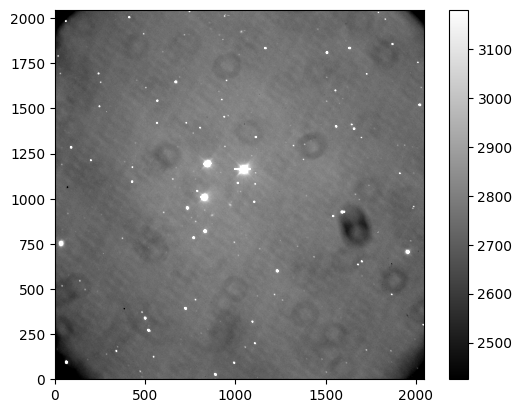

In [8]:
Data=HDUList[0].data[0]  # Get the data array (a simple numpy array) and reducing one dimension using data[0]
print(Data)
mean,median,std=sigma_clipped_stats(Data)   #get some image statistics
plt.Figure(figsize=(10,10))
plt.imshow(Data,vmin=median-6*std,vmax=median+8*std,origin='lower',cmap='gray')
plt.colorbar()
plt.show()


# Bias Frames

The detector image comes with an electronic offset introduced by the voltages applied to the amplifier. This can be clearly seen in the science image above: even the unexposed parts of the detector have an apparent signal level. We have to remove this offset to get real counts received by the detector.


We take odd number of frames due to take median afterwards.



Warning: commenting out(#) before .writeto line otherwise you got repeatative images.

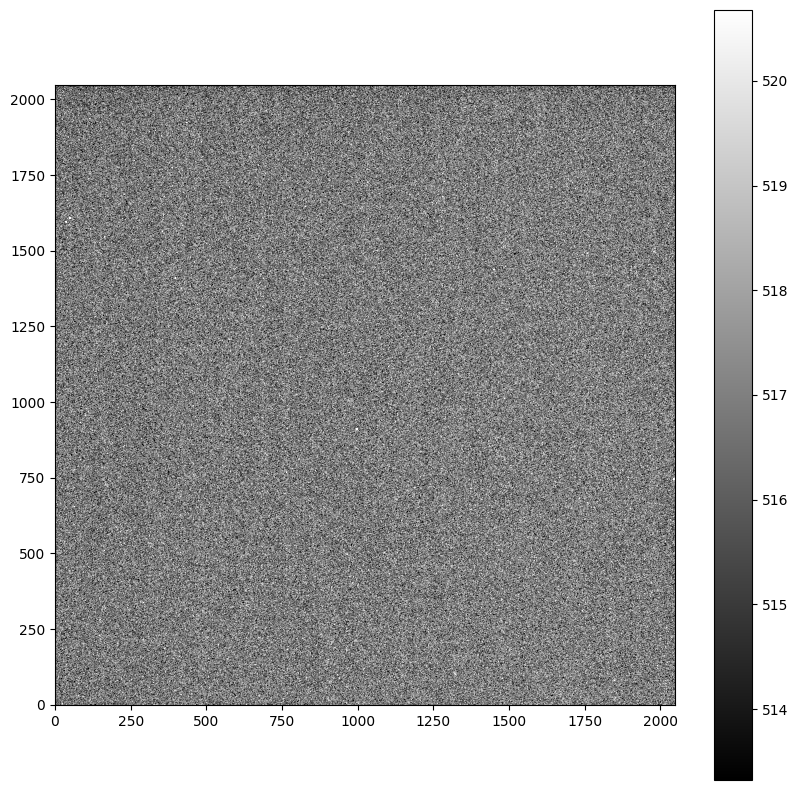

the median of bias image: 517.0
the  mean  of the bias image: 516.8840980351071


In [9]:
#This is just to check for one fits file:

bias = fits.open(bias_files[4])
Data = bias[0].data[0]
mean,median,std= sigma_clipped_stats(Data)
plt.figure(figsize=(10,10))
plt.imshow(Data,vmin=median-std,vmax=median+std,origin='lower',cmap='gray')
plt.colorbar()
plt.show()

print("the median of bias image:",median)
print("the  mean  of the bias image:",mean)

[[514 521 521 ... 522 524 519]
 [516 517 523 ... 518 515 524]
 [522 517 511 ... 519 522 522]
 ...
 [516 514 524 ... 519 517 522]
 [516 519 520 ... 511 521 522]
 [512 518 523 ... 524 514 528]]
[[518 523 514 ... 522 517 517]
 [514 513 511 ... 518 517 516]
 [514 517 512 ... 521 523 514]
 ...
 [522 516 510 ... 522 519 525]
 [514 514 521 ... 520 513 518]
 [518 518 517 ... 518 519 516]]
[[520 521 519 ... 520 522 520]
 [527 522 523 ... 524 526 516]
 [523 526 514 ... 524 524 521]
 ...
 [510 514 517 ... 517 514 517]
 [514 519 519 ... 514 514 517]
 [516 518 522 ... 525 520 524]]
[[512 516 513 ... 514 514 514]
 [515 515 513 ... 516 522 517]
 [514 520 508 ... 517 519 519]
 ...
 [512 513 516 ... 519 520 516]
 [512 520 520 ... 523 511 515]
 [517 514 513 ... 515 512 517]]
[[517 516 516 ... 516 519 515]
 [523 511 523 ... 520 516 518]
 [512 514 521 ... 519 514 521]
 ...
 [518 526 516 ... 522 521 513]
 [517 518 515 ... 519 512 510]
 [515 516 518 ... 519 513 523]]


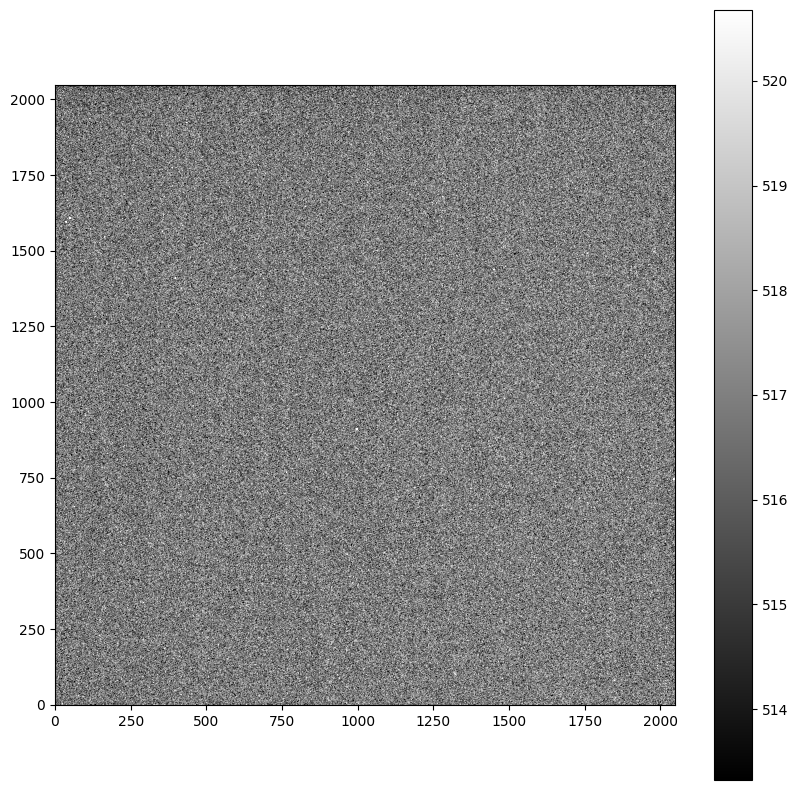

the median of bias image: 517.0
the  std  of the bias image: 3.6773283842883626


In [10]:
for i in range (0,len(bias_files)):
    bias = fits.open(bias_files[i]) # The first bias image
    Data = bias[0].data[0]
    print(Data)                     # Get the data array (a simple numpy array)
mean,median,std= sigma_clipped_stats(Data)
plt.figure(figsize=(10,10))         # set up the plot panel
plt.imshow(Data,vmin=median-std,vmax=median+std,origin='lower',cmap='gray')
plt.colorbar()
plt.show()

print("the median of bias image:",median)
print("the  std  of the bias image:",std)

# Creating  Masterbias :

Different bias-removal methods are employed by different detectors. In most cases, we record a set of images ("bias frames") with zero exposure time, so that the recorded image reflects only the intrinsic offsets in the detector (the detector does not receive any photons if the exposure time is zero). To reduce detector noise and to remove cosmic ray contamination, we usually take many bias frames and average them together using median-combination. (Even though the exposure time is zero, cosmic rays can strike the detector during readout.)



In [11]:
biaslist=[]

for i in range (0,len(bias_files)):
        Data= ccdproc.CCDData.read(bias_files[i],unit='adu')[0]
        header=Data.header
        biaslist.append(Data)
print(biaslist)
        
masterbias=ccdproc.combine(biaslist,method='median',sigma_clip=True,sigma_clip_low_thresh=5,sigma_clip_high_thresh=5,sigma_clip_func=np.ma.median,sigma_clip_dev_func=mad_std)
#fits.writeto('masterbias.fits',masterbias,header,overwrite=True)

[CCDData([[514, 521, 521, ..., 522, 524, 519],
         [516, 517, 523, ..., 518, 515, 524],
         [522, 517, 511, ..., 519, 522, 522],
         ...,
         [516, 514, 524, ..., 519, 517, 522],
         [516, 519, 520, ..., 511, 521, 522],
         [512, 518, 523, ..., 524, 514, 528]], dtype=uint16, unit='adu'), CCDData([[518, 523, 514, ..., 522, 517, 517],
         [514, 513, 511, ..., 518, 517, 516],
         [514, 517, 512, ..., 521, 523, 514],
         ...,
         [522, 516, 510, ..., 522, 519, 525],
         [514, 514, 521, ..., 520, 513, 518],
         [518, 518, 517, ..., 518, 519, 516]], dtype=uint16, unit='adu'), CCDData([[520, 521, 519, ..., 520, 522, 520],
         [527, 522, 523, ..., 524, 526, 516],
         [523, 526, 514, ..., 524, 524, 521],
         ...,
         [510, 514, 517, ..., 517, 514, 517],
         [514, 519, 519, ..., 514, 514, 517],
         [516, 518, 522, ..., 525, 520, 524]], dtype=uint16, unit='adu'), CCDData([[512, 516, 513, ..., 514, 514, 514],

[[517.  521.  516.  ... 520.  519.  517. ]
 [516.  515.  523.  ... 518.  517.  517. ]
 [514.  517.  512.  ... 519.  522.  521. ]
 ...
 [516.  514.  516.  ... 519.  519.  517. ]
 [514.  519.  520.  ... 519.  512.5 517. ]
 [516.  518.  518.  ... 519.  514.  523. ]]


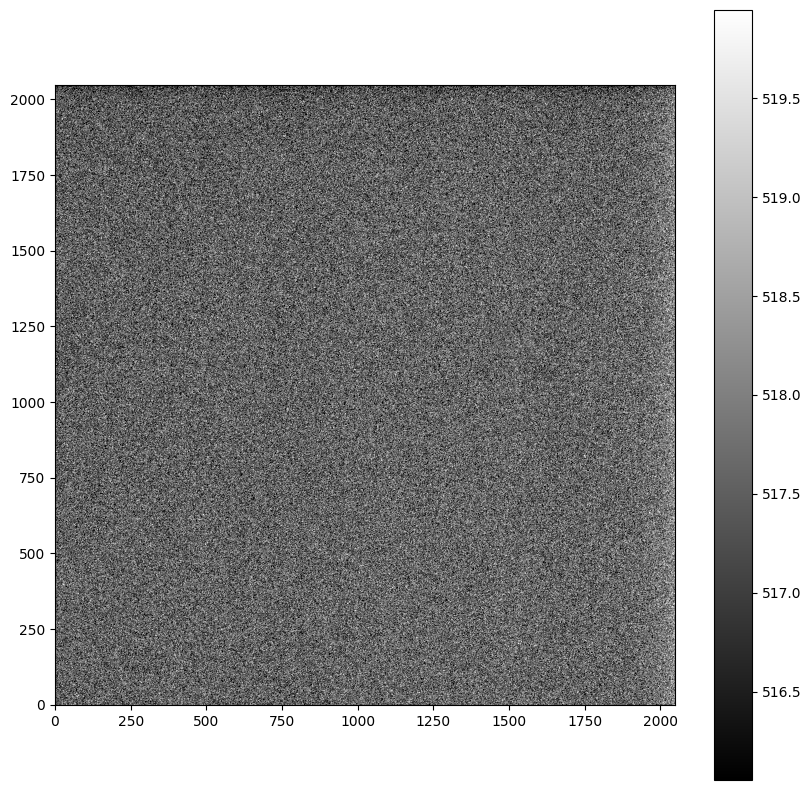

the median of bias image: 518.0
the  std of the bias image: 1.9449371261522372


In [12]:
bias=fits.open('masterbias.fits')
Data=bias[0].data
print(Data)

mean,median,std=sigma_clipped_stats(Data)
plt.figure(figsize=(10,10))
plt.imshow(Data,vmin=median-std,vmax=median+std,origin='lower',cmap='gray')
plt.colorbar()
plt.show()

print("the median of bias image:",median)
print("the  std of the bias image:",std)

# Flat  correction

For flat fields, we expose the detector to a uniform light source - this can either be a uniformly illuminated part of the telescope dome or the twilight sky (the assumption is that the sky is uniformly bright over a small field of view). 

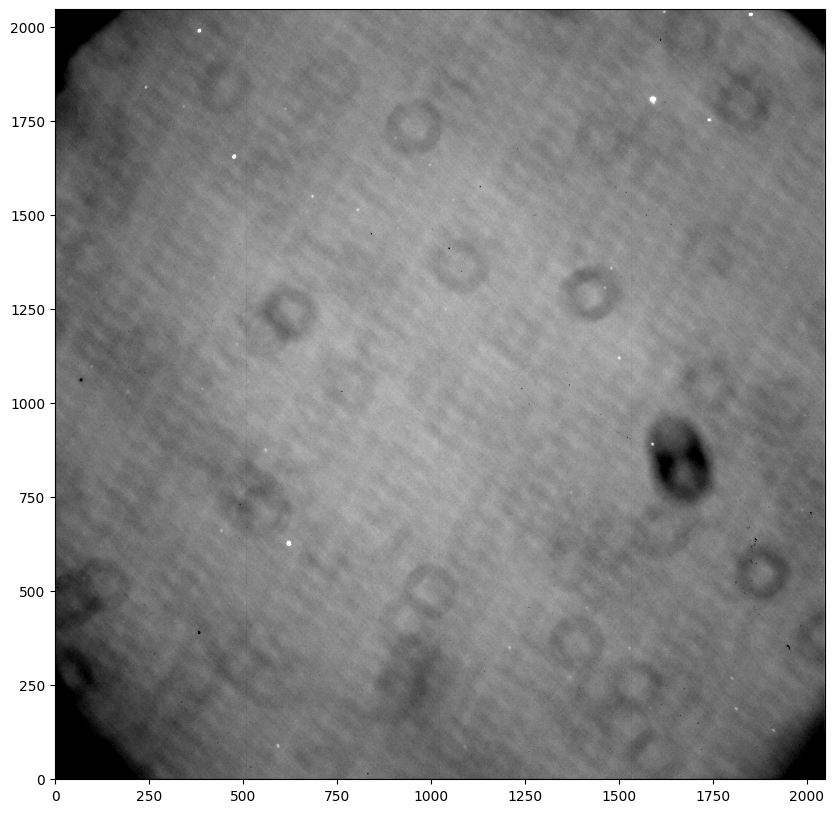

The median of flat image is: 8588.0
the standard deviation is: 161.12762960942626


In [13]:
flat=fits.open(flat_files[1])
Data=flat[0].data[0]
mean,median,std=sigma_clipped_stats(Data)

plt.figure(figsize=(10,10))
plt.imshow(Data,vmin=median-5*std,vmax=median+5*std,origin='lower',cmap='gray')
plt.show()

print("The median of flat image is:",median)
print("the standard deviation is:",std)


# Creating Masterflat

In [14]:
'''
flatlist = []
for j in range(0,len(flat_files)):
    flat=ccdproc.CCDData.read(flat_files[j],unit='adu')
    flat_bias_removed=ccdproc.subtract_bias(flat,masterbias)
    flatlist.append(flat_bias_removed)

    def inv_median(a):
        return 1 / np.median(a)

'''

flatlist=[]

for j in range (0,len(flat_files)):
        Data= ccdproc.CCDData.read(flat_files[j],unit='adu')
        header=Data.header
        flatlist.append(Data)
#print(flatlist)

# Extract the 2D slice from the 3D data
flatlist= Data[:,:]
print(flatlist)

masterflat = ccdproc.combine(flatlist,method='median', #scale=inv_median,
                                 sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                                 sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std)
#fits.writeto('masterflat.fits',masterflat,header,overwrite=True)

[[[4787 4841 4782 ... 7388 7039 6931]
  [4844 4865 4842 ... 7582 7419 7751]
  [4798 4927 4898 ... 7542 7530 7776]
  ...
  [4616 4620 4621 ... 7489 7291 7526]
  [4580 4639 4672 ... 7519 7222 7397]
  [4526 4524 4594 ... 7253 6797 6534]]] adu


The master flat field is formed by median combination in a similar way to the master bias frame, above. There are two big differences. First, we have to remove the bias from each image. Second, we have to adjust for the fact that the light level may be changing from image to image by measuring the average pixel level in each image and dividing the image by it (normalizing).

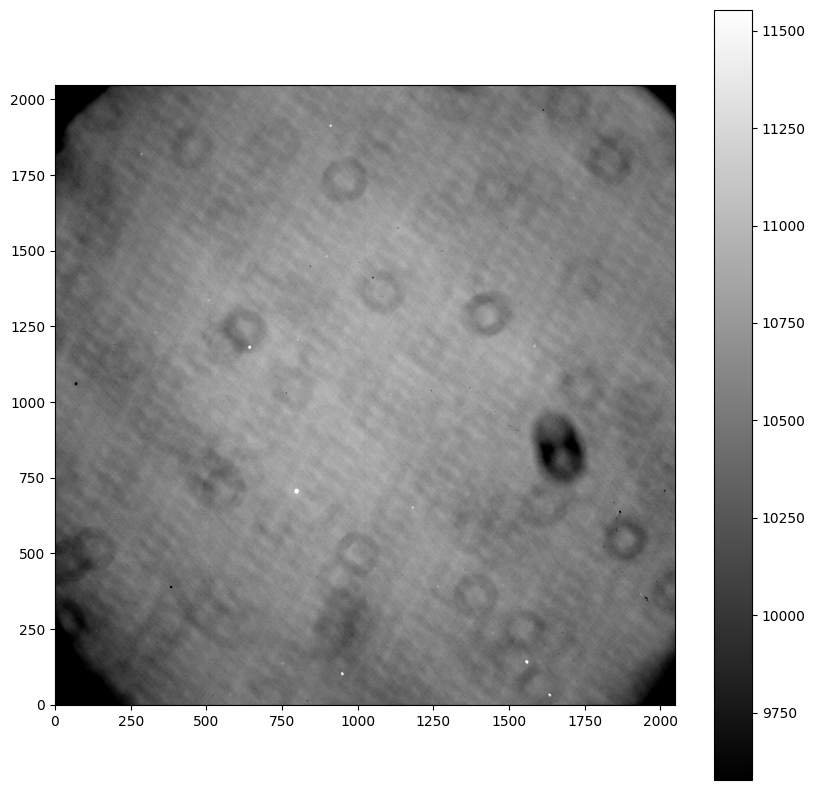

The median of mflat image is: 10565.0
The standard deviation is: 197.63150305498405


In [26]:
mflat = fits.open('masterflat.fits')  
Data = mflat[0].data 
mean, median, std = sigma_clipped_stats(Data)
 
plt.figure(figsize=(10,10))                    
plt.imshow(Data, vmin = median - 5*std, vmax = median + 5*std, origin='lower',cmap='gray')
plt.colorbar()
plt.show()


print('The median of mflat image is:',median) 
print('The standard deviation is:',std)

#  Pre-processing of Images / Cosmic ray removed

Now we will apply the bias flat calibrations and cosmic ray removal to the science frames and write processed science frames to disk for further processing. To simplify matters, we will write these processed files in 'simple' FITS format, combining the primary header data with the (bias- and flat-corrected) image data in the FITS extension for each file.

In [ ]:

filename="*sci*.fits"
file_names = sorted(glob(os.path.join(path,filename)))
for i in range(0,len(file_names)):
    #image=ccdproc.CCDData.read(file_names[i],unit='adu')
    image=fits.getdata(file_names[i],0)[0]
    header=fits.getheader(file_names[i],0)
    #bias_subtracted = ccdproc.subtract_bias(image, masterbias)
    #flat_corrected = ccdproc.flat_correct(bias_subtracted, masterflat)
    flat_corrected = (image-masterbias)/masterflat
    cr_cleaned = ccdproc.cosmicray_lacosmic(flat_corrected,readnoise=7.5, sigclip=5,satlevel=65535,niter=20,cleantype='meanmask')
        #print('Cosmic rays removed')
    clean_file=file_names[i].replace('.fits','')
    #fits.writeto(clean_file+'_cln.fits',cr_cleaned,header,overwrite=True)
    print('Image no-%i has been cleaned'%i)

    

In [ ]:
cl_files=sorted(glob(os.path.join(path,'*cln*.fits')))
cl = fits.open(cl_files[0])  
data = cl[0].data 
mean, median, std = sigma_clipped_stats(data)
 
plt.figure(figsize=(10,10))                    
plt.imshow(data[0], vmin = median - 8*std, vmax = median + 16*std, origin='lower',cmap='gray')
plt.colorbar()
plt.show()

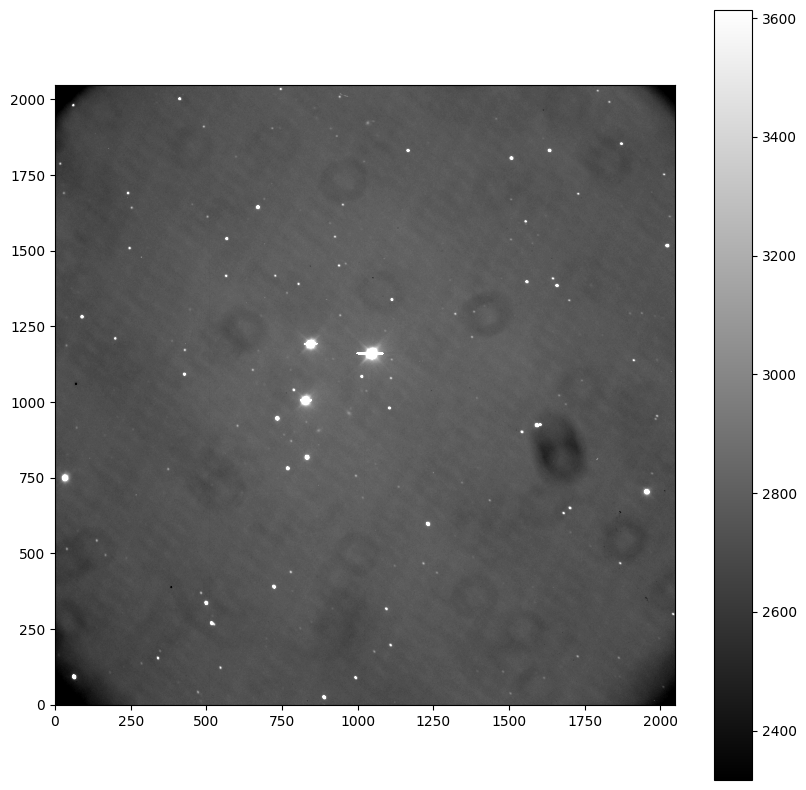

In [18]:
cl_files=sorted(glob(os.path.join(path,'*sci*.fits')))
cl = fits.open(cl_files[0])  
data = cl[0].data[0]
mean, median, std = sigma_clipped_stats(data)
 
plt.figure(figsize=(10,10))                    
plt.imshow(data, vmin = median - 8*std, vmax = median + 16*std, origin='lower',cmap='gray')
plt.colorbar()
plt.show()

# 2nd Part: Image Alignment

importing necessary packages:

In [29]:
import astroalign as aa
from astropy.nddata import CCDData
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import itertools


Giving the Path where all the data/objects fits files are:

In [30]:

dir="/home/osama/Downloads/ARIES/photometry/DATA_1.3mDFOT_Osama/"
fnames1 =sorted(glob.iglob(dir+'science_cln*.fits'),key=lambda f: int(re.sub('\D', '', f)))


In [31]:
len(fnames1)

16

In [32]:
#for writing the output files
f=[str.split(i,'/') for i in fnames1]
names=[i[-1] for i in f]

# #int(names[0])
f1=[str.split(i,'_') for i in names]
names=[i[-1] for i in f1]
f2=[str.split(i,'.') for i in names]
n=[i[0] for i in f2]
# names=[names[i][:-23] for i in range(len(names))]
print(n)


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']


In [ ]:

for i,f in enumerate(fnames1):
    print(f)
    #print(fnames[8])
    source_obj = CCDData.read(f, unit='adu')[0]
    source = np.array(CCDData.read(f, unit='adu')[0]).astype('float32')
    target = np.array(CCDData.read(fnames1[1], unit='adu')[0]).astype('float32') #this is reference frame
    aa.NUM_NEAREST_NEIGHBORS = 8
    aa.MIN_MATCHES_FRACTION = 0.3
    registered_image, footprint = aa.register(source, target, detection_sigma=5)
    source_obj.data = registered_image
    #source_obj.write(dir + "science_" +n[i]+'aligned.fits', overwrite=True)    #giving you aligned images.

In [33]:
%matplotlib inline

In [40]:
#from convenience_functions import show_image
import matplotlib.pyplot as plt
#Showing aligned images
fnames1 =sorted(glob.iglob(dir+'science_aligned*.fits'),key=lambda f: int(re.sub('\D', '', f)))
#fig, axes = plt.subplots(nrows=17, ncols=4)
axs = axes.flatten()

for ax, f in zip(axs, fnames1):
    source = CCDData.read(f, unit='adu')
    #plt.imshow(source,origin='lower',cmap='gray')
    plt.figure(figsize=(10,10))                    

    #plt.show()


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

I use SEP Module of python to do the photometry . That file is in different file name "SEP_photometry." 